In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi
from qiskit import QuantumCircuit, Aer, execute

# Create a Quantum Circuit
circ = QuantumCircuit(3,3)

# Apply a U gate with specified parameters to qubit 2
circ.u(pi/2,0,0,2)

# Apply an X gate to qubit 0 (Pauli-X gate, also known as a bit-flip gate)
circ.x(0)

# Apply a controlled-X (CNOT) gate with qubit 2 as the control and qubit 1 as the target
circ.cx(2, 1)

# Apply a U gate with specified parameters to qubit 2
circ.u(-pi/4, 0, 0, 2)

# Apply a controlled-X (CNOT) gate with qubit 1 as the control and qubit 2 as the target
circ.cx(1, 2)

# Apply a U gate with specified parameters to qubit 2
circ.u(pi/4, 0, 0, 2)

# Apply controlled-X (CNOT) gates to perform certain quantum operations
circ.cx(2, 1)
circ.cx(1, 0)
circ.cx(2, 0)

# Measure qubits 0, 1, and 2, and store the measurement results in classical bits 0, 1, and 2
circ.measure([0, 1, 2], [0, 1, 2])

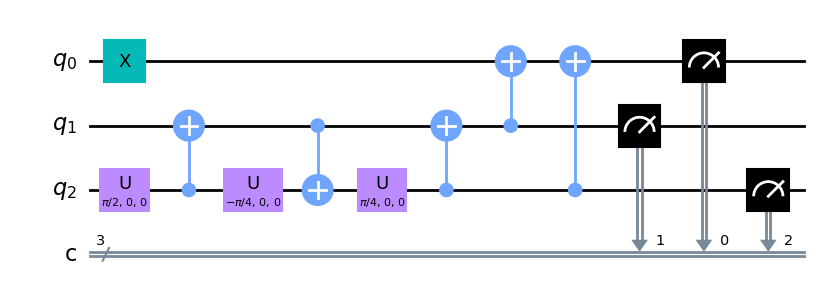

In [2]:
# Visualize the quantum circuit using Matplotlib
circ.draw('mpl')

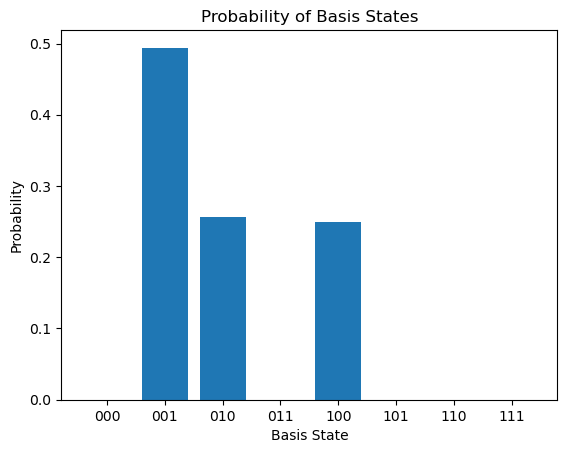

In [3]:
# Simulate the circuit to get the measurement probabilities
simulator_backend = Aer.get_backend('qasm_simulator')  # Choose the Qiskit Aer simulator as the backend
job = execute(circ, simulator_backend, shots=1024)  # Simulate the 'circ' circuit with 1024 shots
result = job.result()  # Get the result of the simulation
counts = result.get_counts(circ)  # Get the measurement outcomes (counts)

# Convert counts to a sorted list of probabilities
basis_states = ['000', '001', '010', '011', '100', '101', '110', '111']  # List of possible basis states
probabilities = [counts.get(state, 0) / 1024 for state in basis_states]  # Calculate probabilities for each basis state

# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)  
plt.xlabel('Basis State')  
plt.ylabel('Probability')  
plt.title('Probability of Basis States')  
plt.show()  